In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import mixture
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score
import itertools
from scipy import linalg
import matplotlib as mpl
import matplotlib.cm as cm
%matplotlib inline

In [182]:
df = pd.read_csv("./Data/Wholesale customers data.csv")

In [183]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [184]:
df.describe()
# Channel has 2 categories
# Region has 3 categories

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

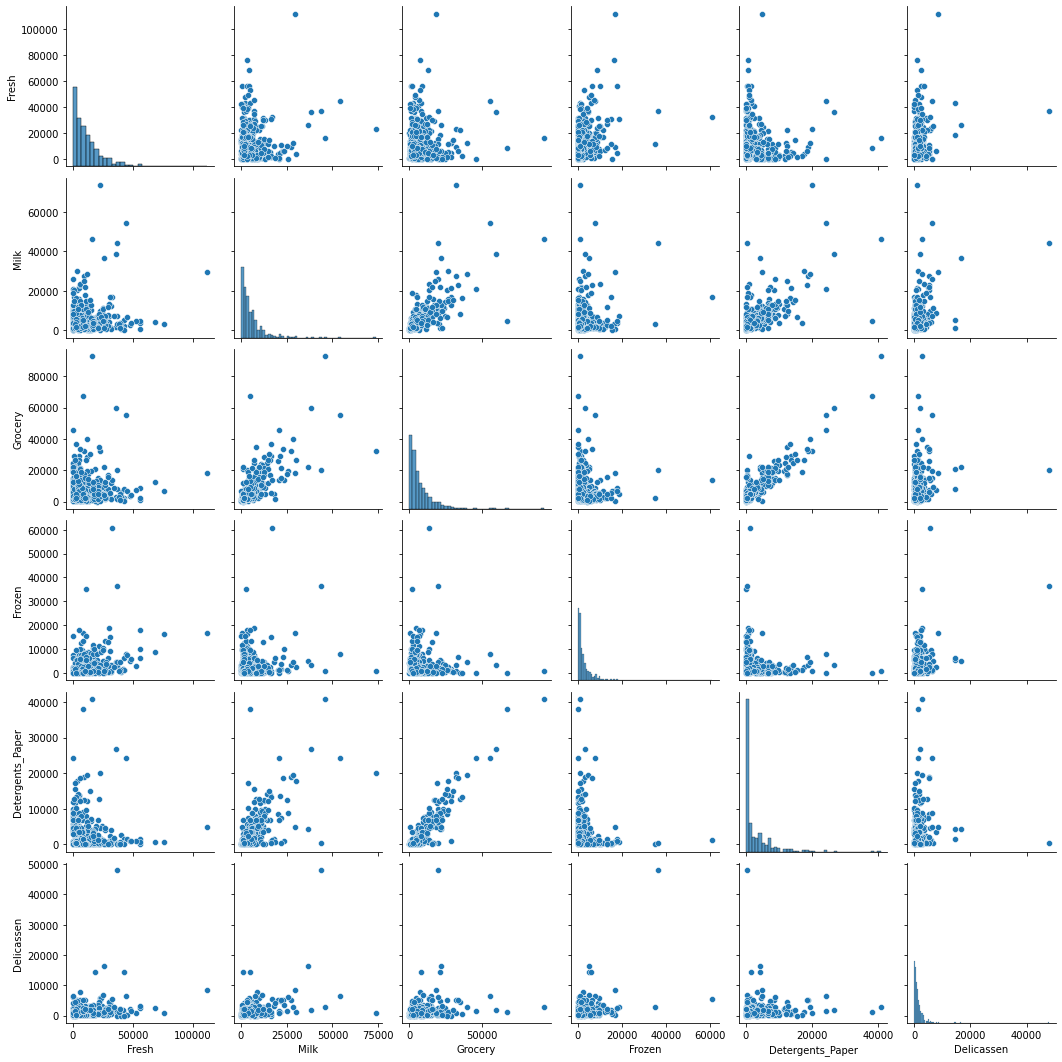

In [185]:
sns.pairplot(df[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]])

In [186]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df["Outliers"] = lof.fit_predict(df[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]])

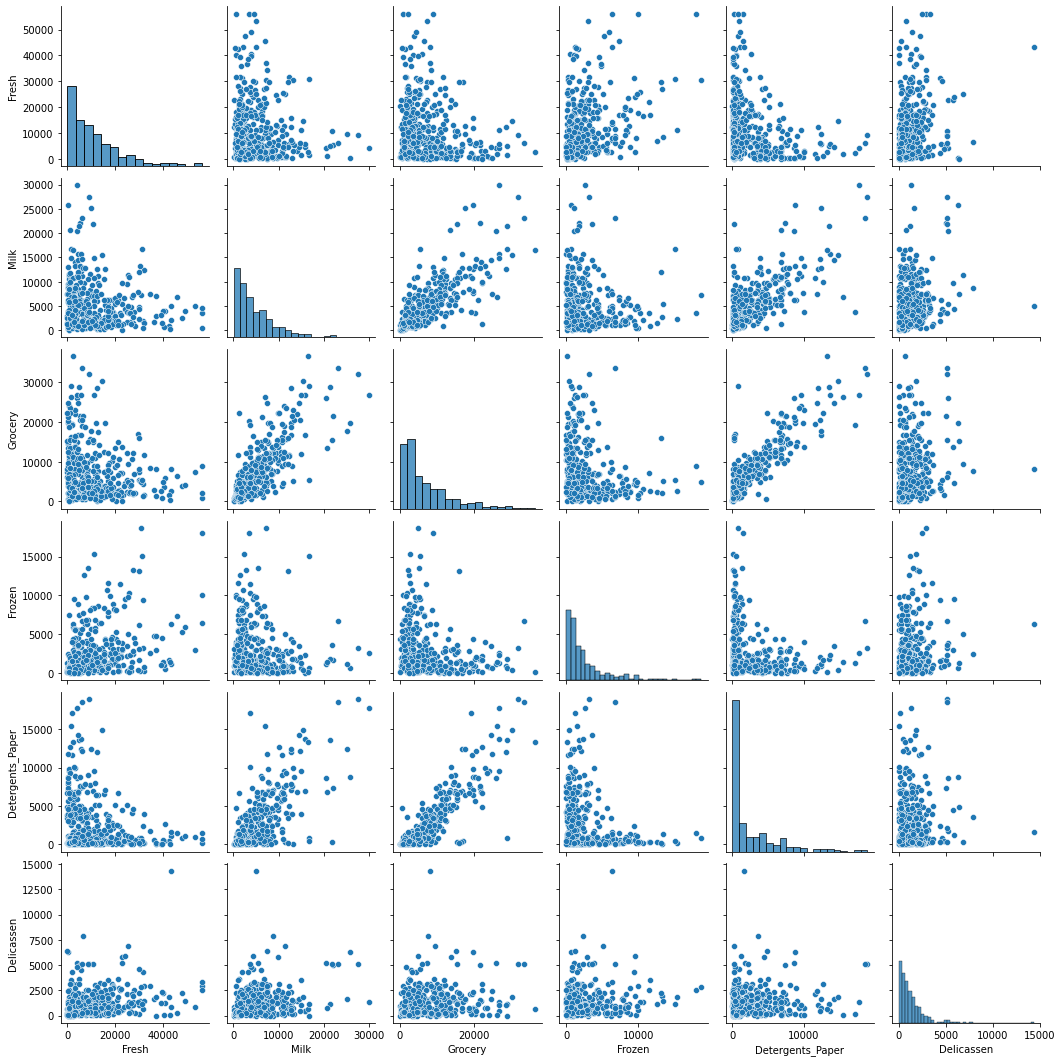

In [187]:
df_cut = df[df["Outliers"]==1]
sns.pairplot(df_cut[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]])

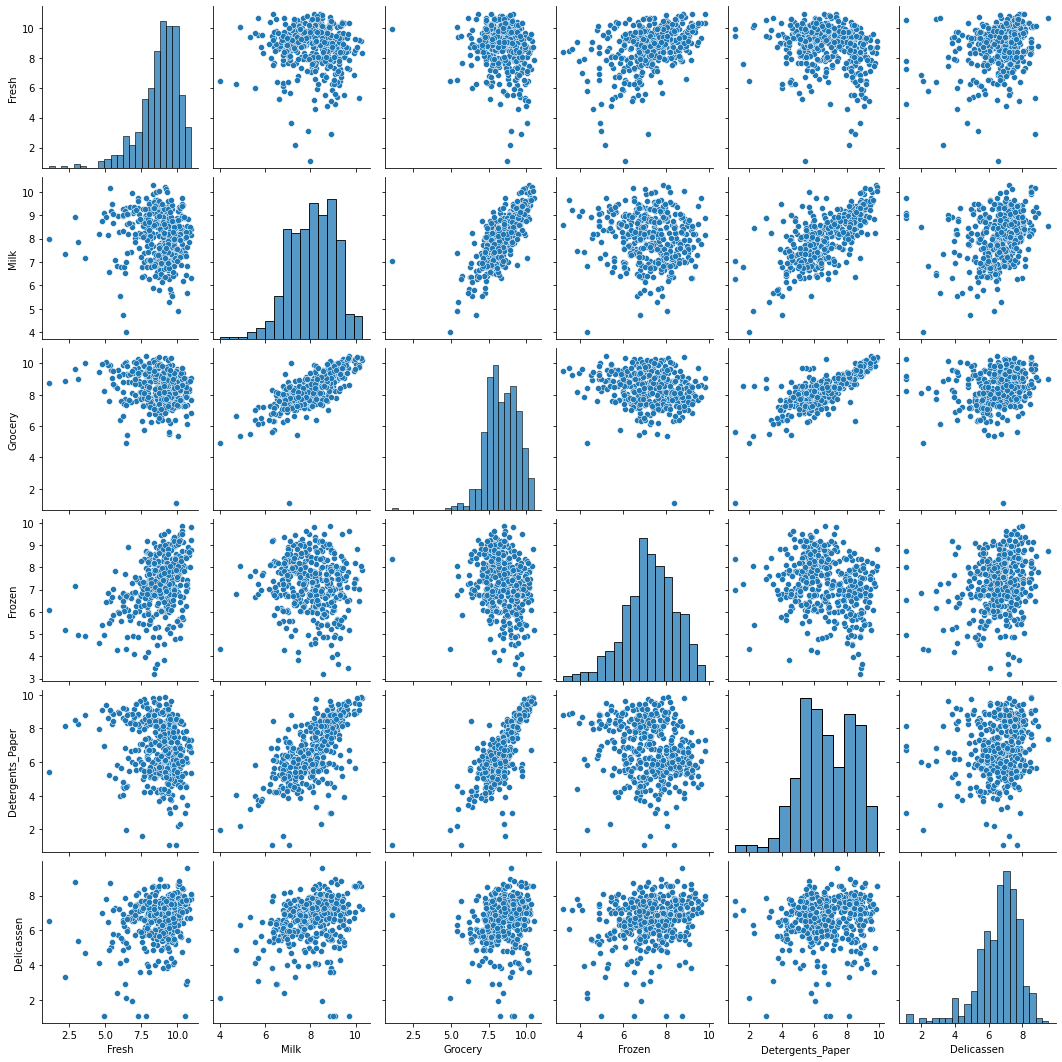

In [188]:
df_log = np.log(df_cut[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]])
sns.pairplot(df_log[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]])

<AxesSubplot:>

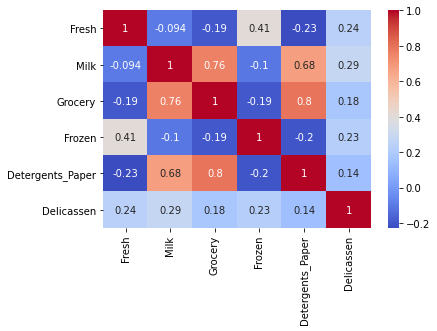

In [189]:
sns.heatmap(df_log[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].corr(), cmap="coolwarm", annot=True)
# Grocery is correlated with Milk and Detergents_Paper

<AxesSubplot:xlabel='Grocery', ylabel='Detergents_Paper'>

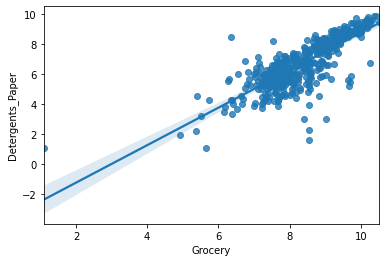

In [190]:
sns.regplot(x="Grocery", y="Detergents_Paper", data=df_log[["Grocery", "Detergents_Paper"]])

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

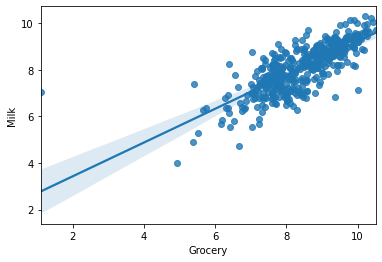

In [191]:
sns.regplot(x="Grocery", y="Milk", data=df_log[["Grocery", "Milk"]])

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

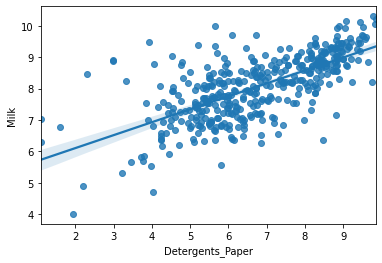

In [192]:
sns.regplot(x="Detergents_Paper", y="Milk", data=df_log[["Milk", "Detergents_Paper"]])

In [193]:
sc = StandardScaler()
df_z_scaled = df_log[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]]
df_z_scaled = sc.fit_transform(df_z_scaled)
print(df_z_scaled)

[[ 0.52160684  1.09453339  0.51365812 -1.55597739  0.69178334  0.47277567]
 [ 0.10836709  1.11004022  0.73314499  0.19100215  0.81587762  0.69458288]
 [ 0.03414775  1.00444977  0.52870273  0.44879485  0.85492832  1.85801328]
 ...
 [ 0.61844896  1.55758469  1.80609374 -0.96435821  1.71316182  0.73372136]
 [ 0.37472204 -0.45781498 -0.62386746 -0.24748003 -0.957475    0.83510461]
 [-0.54775528 -0.60888753 -0.51442765 -2.54338501 -0.33555249 -2.07098081]]


In [194]:
pca = PCA(random_state=42)
df_pca = pca.fit_transform(df_z_scaled)
print(pca.explained_variance_ratio_)
df_pca = pd.DataFrame(df_pca)

[0.4441285  0.26370681 0.11242591 0.09883897 0.05045072 0.03044909]


Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4441  0.1948 -0.5307  -0.5660  0.1921   
Dimension 2              0.2637 -0.5719 -0.1802  -0.0603 -0.5634   
Dimension 3              0.1124  0.2866  0.0942   0.1790  0.4530   
Dimension 4              0.0988 -0.7390 -0.0419  -0.0337  0.6633   
Dimension 5              0.0505 -0.0808  0.7512  -0.0851 -0.0109   
Dimension 6              0.0304  0.0092  0.3331  -0.7972 -0.0190   

             Detergents_Paper  Delicassen  
Dimension 1           -0.5494     -0.1461  
Dimension 2           -0.0133     -0.5650  
Dimension 3            0.1963     -0.7957  
Dimension 4            0.0176      0.1033  
Dimension 5           -0.6377     -0.1229  
Dimension 6            0.5024     -0.0235

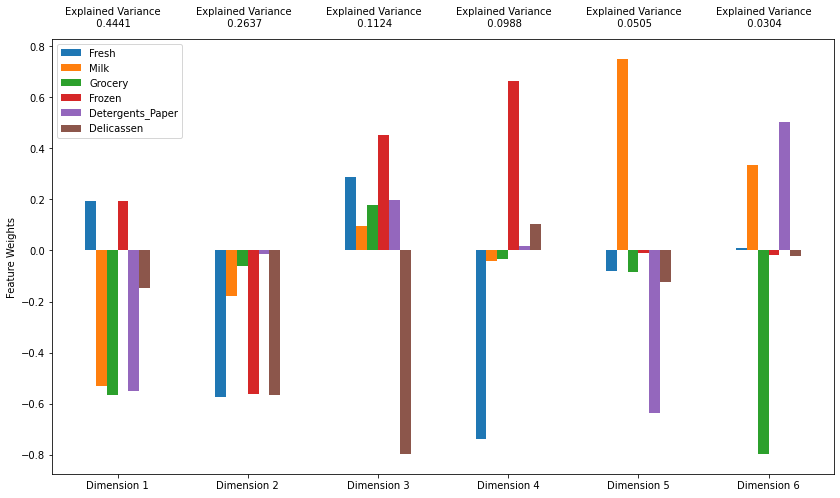

In [195]:
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

pca_results(df_log, pca)

<AxesSubplot:title={'center':'PC plane with original feature projections.'}, xlabel='Dimension 1', ylabel='Dimension 2'>

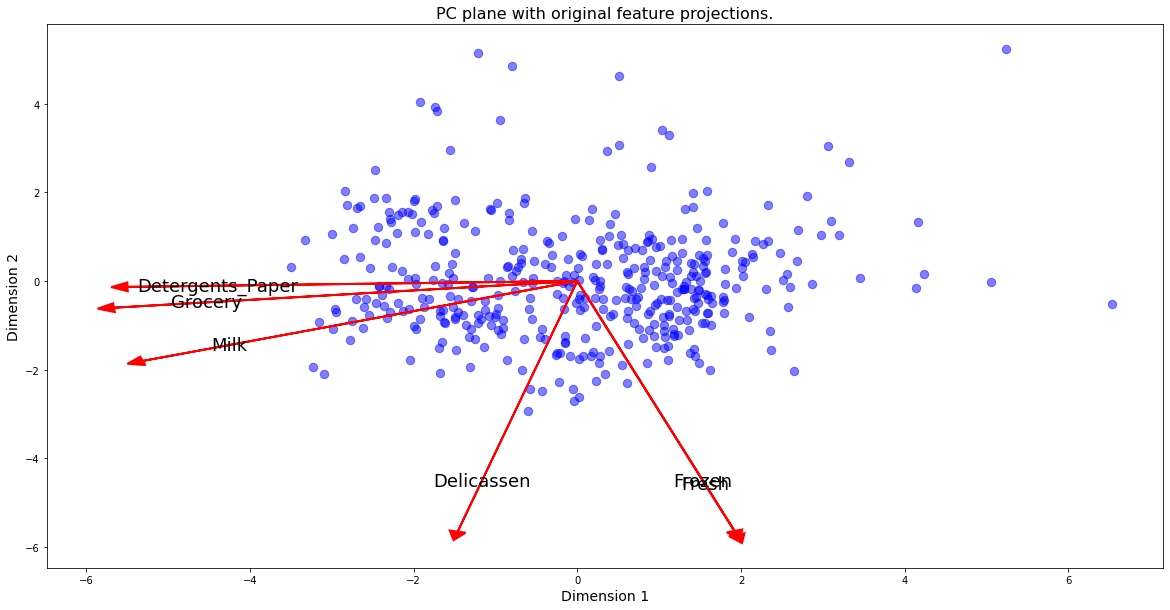

In [196]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute
    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (20,10))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.iloc[:,0], y=reduced_data.iloc[:,1], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 10.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax
biplot(df_log, df_pca, pca)

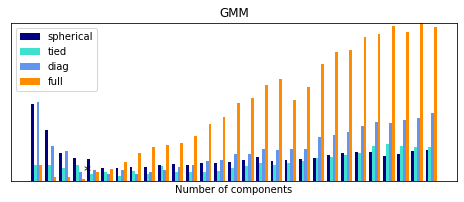

In [197]:
def gmm_fit(df, rand):

    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 30)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type, random_state=rand)
            gmm.fit(df_z_scaled)
            bic.append(gmm.bic(df_z_scaled))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    plt.figure(figsize=(8, 6))
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    plt.xticks(())
    plt.yticks(())
    plt.title('GMM')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()

gmm_fit(df_pca, 42)



In [198]:
gmm_final = mixture.GaussianMixture(n_components=4,
                                      covariance_type="full", random_state=50)
gmm_final.fit(df_z_scaled)
groups = gmm_final.predict(df_z_scaled)

In [199]:
print(groups)

[0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 2 0 1 0 1 0 2 2 0 0 2 2 0 2 2 1 2 2 1 0 2 0
 0 3 2 0 0 0 0 0 0 0 0 2 1 0 0 2 0 0 0 2 0 0 0 0 2 3 0 1 1 2 1 2 0 1 1 0 2
 0 2 0 0 2 1 2 3 2 2 2 0 0 3 3 3 3 2 0 0 0 2 2 2 0 0 0 3 2 0 2 2 2 2 2 2 2
 2 2 1 3 1 2 2 0 3 2 1 1 2 2 1 2 0 3 1 1 2 1 3 2 1 2 2 2 2 2 1 2 1 3 0 0 2
 0 0 0 1 2 0 0 0 0 0 2 2 0 0 0 0 3 0 3 1 1 1 2 0 3 1 1 3 0 0 3 3 2 3 2 2 2
 0 2 2 0 0 2 3 1 0 2 1 0 0 2 2 0 0 0 0 2 3 2 2 0 2 1 2 2 0 2 1 2 2 1 2 3 2
 1 2 1 2 2 2 2 2 0 0 0 2 2 1 2 1 0 2 1 2 1 1 2 2 1 2 2 1 0 0 2 0 2 2 1 1 2
 1 1 2 2 0 1 0 2 2 3 1 2 2 3 0 2 1 0 2 0 2 0 0 3 0 0 0 0 0 3 0 2 2 0 2 3 1
 2 2 0 2 1 3 0 1 2 2 1 2 2 3 2 2 2 0 2 2 0 2 2 1 0 0 0 3 2 0 0 0 1 0 2 0 3
 0 2 3 3 3 1 2 2 1 1 2 0 2 1 2 2 2 2 1 0 2 1 0 2 1 1 2 2 2 1 1 2 1 2 2 2 2
 1 1 2 2 2 0 2 2 2 2 2 1 1 2 2 2 0 0 0 0 1 3 2 0 0 0 0 1 0 0 2 0 1 2 0 2 1
 1 1 2 2 1 0 1 2 0 2 1]


In [200]:
silhouette_score(df_pca, groups)

0.18323588108449052

In [201]:
gmm_2 = mixture.GaussianMixture(n_components=2,
                                      covariance_type="full", random_state=50)
gmm_2.fit(df_z_scaled)
groups = gmm_2.predict(df_z_scaled)
centers = gmm_2.means_
print(centers)
silhouette_score(df_pca, groups)

[[-0.34971131  0.79289858  0.91541509 -0.46173092  1.05217304  0.22824117]
 [ 0.1913452  -0.43383594 -0.50087108  0.25263693 -0.57569844 -0.12488258]]


0.269683888053714

In [202]:
groups = pd.Series(groups)
groups.value_counts().sort_values(ascending=False)

1    267
0    151
dtype: int64

In [203]:
df_pca.head()

0         1         2         3         4         5
0 -1.517959  0.073808 -0.600863 -1.419748  0.254000  0.325856
1 -1.495988 -0.817088 -0.039229  0.061442  0.155001  0.176260
2 -1.480634 -1.546337 -0.908345  0.419422 -0.071556  0.290834
3  0.934394 -1.244971  0.019179  0.534400 -0.666501 -0.479016
4 -0.669633 -2.008321 -0.346107  0.005984 -0.202848 -0.015866

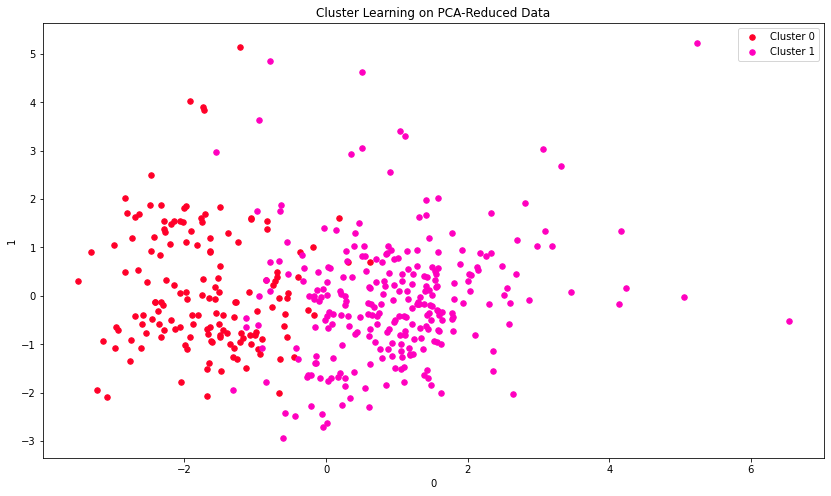

In [222]:
def cluster_results(reduced_data, preds):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)
    
	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
    
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 0, y = 1, \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data");4
cluster_results(df_pca, groups)